In [12]:
import pandas as pd
import numpy as np
import requests, zipfile
import io
import gzip
import simplejson
%matplotlib inline
import matplotlib.pyplot as plt

## Read in Electronics data from AWS

In [93]:
#links of all reviews
link_url_str =  '''https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Wireless_v1_00.tsv.gz
https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Watches_v1_00.tsv.gz
https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Video_Games_v1_00.tsv.gz
https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Video_DVD_v1_00.tsv.gz
https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Video_v1_00.tsv.gz
https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Toys_v1_00.tsv.gz
https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Tools_v1_00.tsv.gz
https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Sports_v1_00.tsv.gz
https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Software_v1_00.tsv.gz
https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Shoes_v1_00.tsv.gz
https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Pet_Products_v1_00.tsv.gz
https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Personal_Care_Appliances_v1_00.tsv.gz
https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_PC_v1_00.tsv.gz
https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Outdoors_v1_00.tsv.gz
https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Office_Products_v1_00.tsv.gz
https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Musical_Instruments_v1_00.tsv.gz
https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Music_v1_00.tsv.gz
https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Mobile_Electronics_v1_00.tsv.gz
https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Mobile_Apps_v1_00.tsv.gz
https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Major_Appliances_v1_00.tsv.gz
https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Luggage_v1_00.tsv.gz
https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Lawn_and_Garden_v1_00.tsv.gz
https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Kitchen_v1_00.tsv.gz
https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Jewelry_v1_00.tsv.gz
https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Home_Improvement_v1_00.tsv.gz
https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Home_Entertainment_v1_00.tsv.gz
https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Home_v1_00.tsv.gz
https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Health_Personal_Care_v1_00.tsv.gz
https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Grocery_v1_00.tsv.gz
https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Gift_Card_v1_00.tsv.gz
https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Furniture_v1_00.tsv.gz
https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Electronics_v1_00.tsv.gz
https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Digital_Video_Games_v1_00.tsv.gz
https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Digital_Video_Download_v1_00.tsv.gz
https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Digital_Software_v1_00.tsv.gz
https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Digital_Music_Purchase_v1_00.tsv.gz
https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Digital_Ebook_Purchase_v1_01.tsv.gz
https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Digital_Ebook_Purchase_v1_00.tsv.gz
https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Camera_v1_00.tsv.gz
https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Books_v1_02.tsv.gz
https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Books_v1_01.tsv.gz
https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Books_v1_00.tsv.gz
https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Beauty_v1_00.tsv.gz
https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Baby_v1_00.tsv.gz
https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Automotive_v1_00.tsv.gz
https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Apparel_v1_00.tsv.gz
'''

In [44]:
urls = list()
urls = link_url_str.split('\n')
urls_trimmed = urls[1]
urls_trimmed

'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Watches_v1_00.tsv.gz'

In [8]:
#only reading in electronics reviews
url = 'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Electronics_v1_00.tsv.gz'
e_data = pd.read_table(url, sep='\t', nrows=809815, error_bad_lines=False)
e_data.head()


b'Skipping line 9076: expected 15 fields, saw 22\nSkipping line 19256: expected 15 fields, saw 22\nSkipping line 24313: expected 15 fields, saw 22\nSkipping line 47211: expected 15 fields, saw 22\nSkipping line 54295: expected 15 fields, saw 22\nSkipping line 56641: expected 15 fields, saw 22\nSkipping line 63067: expected 15 fields, saw 22\n'
b'Skipping line 93796: expected 15 fields, saw 22\n'
b'Skipping line 132806: expected 15 fields, saw 22\nSkipping line 164631: expected 15 fields, saw 22\nSkipping line 167019: expected 15 fields, saw 22\nSkipping line 167212: expected 15 fields, saw 22\n'
b'Skipping line 198103: expected 15 fields, saw 22\nSkipping line 199191: expected 15 fields, saw 22\nSkipping line 202841: expected 15 fields, saw 22\nSkipping line 218228: expected 15 fields, saw 22\nSkipping line 235900: expected 15 fields, saw 22\n'
b'Skipping line 277761: expected 15 fields, saw 22\nSkipping line 304582: expected 15 fields, saw 22\nSkipping line 312029: expected 15 fields,

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,41409413,R2MTG1GCZLR2DK,B00428R89M,112201306,yoomall 5M Antenna WIFI RP-SMA Female to Male ...,Electronics,5,0,0,N,Y,Five Stars,As described.,2015-08-31
1,US,49668221,R2HBOEM8LE9928,B000068O48,734576678,"Hosa GPM-103 3.5mm TRS to 1/4"" TRS Adaptor",Electronics,5,0,0,N,Y,It works as advertising.,It works as advertising.,2015-08-31
2,US,12338275,R1P4RW1R9FDPEE,B000GGKOG8,614448099,Channel Master Titan 2 Antenna Preamplifier,Electronics,5,1,1,N,Y,Five Stars,Works pissa,2015-08-31
3,US,38487968,R1EBPM82ENI67M,B000NU4OTA,72265257,LIMTECH Wall charger + USB Hotsync & Charging ...,Electronics,1,0,0,N,Y,One Star,Did not work at all.,2015-08-31
4,US,23732619,R372S58V6D11AT,B00JOQIO6S,308169188,Skullcandy Air Raid Portable Bluetooth Speaker,Electronics,5,1,1,N,Y,Overall pleased with the item,Works well. Bass is somewhat lacking but is pr...,2015-08-31


# Verified vs Unverified purchases

Text(0,0.5,'Reviews')

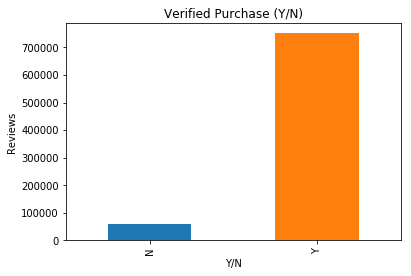

In [202]:
#insights
#Verified vs non verified purchases
e_data.groupby('verified_purchase')['product_title'].count()
verification_status = e_data.groupby('verified_purchase')['product_title']
verification_status.size().plot(kind='bar')
plt.title('Verified Purchase (Y/N)')
plt.xlabel('Y/N')
plt.ylabel('Reviews')

#'customer_id insights'?

In [199]:
#create two sub datasets_verified and non verified
e_ver = e_data[e_data['verified_purchase'] == 'Y']
e_nver = e_data[e_data['verified_purchase'] == 'N']
e_nver['star_rating'].mean()

3.9383379396769267

### Averages 

In [15]:
#slightly higher rating for verified purchases
print(f'Verified avg: {e_ver["star_rating"].mean()}', f'Unverified avg: {e_nver["star_rating"].mean()}')

Verified avg: 4.122314592808045 Unverified avg: 3.9383379396769267


In [ ]:
#Create a slide: could this difference be due to inflatiomnary reviews

### Visualisation number of each rating

Text(0,0.5,'# of Reviews')

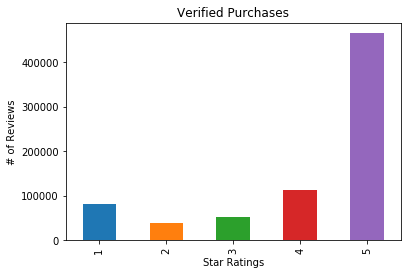

In [203]:
x = [0, 1, 2, 3, 4, 5]
y = [0, 100000, 200000, 300000, 400000, 500000]
rating_ver = e_ver.groupby('star_rating')
rating_ver.size().plot( kind='bar')
plt.title('Verified Purchases')
plt.xlabel('Star Ratings')
plt.ylabel('# of Reviews')

Text(0,0.5,'# of Reviews')

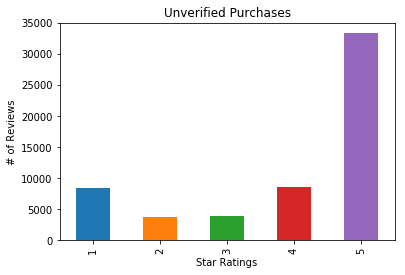

In [204]:
#greateter population of 1*
rating_nver = e_nver.groupby('star_rating')
rating_nver.size().plot(kind='bar')
plt.title('Unverified Purchases')
plt.xlabel('Star Ratings')
plt.ylabel('# of Reviews')

### Length of review for each rating

In [207]:
#avg length of review
calc_list = list()
calc_list2 = list()
for review in e_ver['review_body']:
    calc_list.append(len(str(review)))
    
for review in e_nver['review_body']:
    calc_list2.append(len(str(review)))
    
print(f'Avg len Vreview: {np.array(calc_list).mean()}', f' Avg len of UVreview: {np.array(calc_list2).mean()}')
    

Avg len Vreview: 180.61737687642537  Avg len of UVreview: 640.571180883388


In [208]:
#see if there's any cooreleation between review length and star rating, in each group and whole
e_ver['length'] = e_ver['review_body'].apply(lambda x: len(str(x)))
e_nver['length'] = e_nver['review_body'].apply(lambda x: len(str(x)))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0,0.5,'Star Ratings')

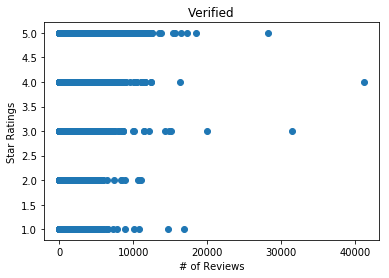

In [211]:
plt.scatter(e_ver['length'], e_ver['star_rating'])
plt.title('Verified')
plt.xlabel('# of Reviews')
plt.ylabel('Star Ratings')

Text(0,0.5,'Ratings')

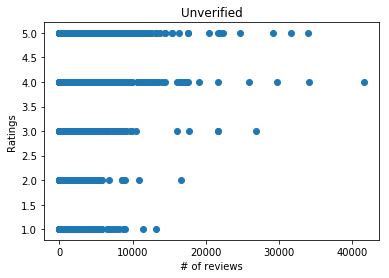

In [210]:
plt.scatter(e_nver['length'], e_nver['star_rating'])
plt.title('Unverified')
plt.xlabel('# of reviews')
plt.ylabel('Ratings')
#place the average len for each rating on the plot

In [31]:
e_data.head()
customer_id, review_id, product_title, star_rating, helpful_votes, verified_purchase, review_body

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,41409413,R2MTG1GCZLR2DK,B00428R89M,112201306,yoomall 5M Antenna WIFI RP-SMA Female to Male ...,Electronics,5,0,0,N,Y,Five Stars,As described.,2015-08-31
1,US,49668221,R2HBOEM8LE9928,B000068O48,734576678,"Hosa GPM-103 3.5mm TRS to 1/4"" TRS Adaptor",Electronics,5,0,0,N,Y,It works as advertising.,It works as advertising.,2015-08-31
2,US,12338275,R1P4RW1R9FDPEE,B000GGKOG8,614448099,Channel Master Titan 2 Antenna Preamplifier,Electronics,5,1,1,N,Y,Five Stars,Works pissa,2015-08-31
3,US,38487968,R1EBPM82ENI67M,B000NU4OTA,72265257,LIMTECH Wall charger + USB Hotsync & Charging ...,Electronics,1,0,0,N,Y,One Star,Did not work at all.,2015-08-31
4,US,23732619,R372S58V6D11AT,B00JOQIO6S,308169188,Skullcandy Air Raid Portable Bluetooth Speaker,Electronics,5,1,1,N,Y,Overall pleased with the item,Works well. Bass is somewhat lacking but is pr...,2015-08-31


## Products with a number of reviews atleast one St.dev above the average per product

In [57]:
#looking only at products that a number or ratings one st.dev above the mean
def weighting(df):
    filtered_df = df.groupby('product_title')['star_rating'].agg(['mean', 'count'])
    filtered_df.columns = ['Avg Rating', '# of Reviews']
    filtered_df['count_rank'] = filtered_df['# of Reviews'].rank(ascending=False)
    #sort = filtered_df[['Avg Rating', '# Of Reviews', 'rank']].sort_values('rank', ascending=True)
    threshold = filtered_df['# of Reviews'].mean() + filtered_df['# of Reviews'].std()
    
    filtered_df['Review # Significance'] = np.where(filtered_df['# of Reviews'] >= threshold, float(1), float(0))
    return filtered_df

e_top = (weighting(e_data)).sort_values('Review # Significance', ascending=False)
e_top.head()

,Avg Rating,# of Reviews,count_rank,Review # Significance
product_title,,,,
TDK Life on Record TREK Max A34 Wireless Weatherproof Speaker,4.324074,216,504.0,1.0
Sherwood RX-4109 200W Stereo Receiver – Black,3.929245,212,514.5,1.0
"eForCity 538581 HDMI to 5 RCA Cable, 5-Feet",2.312500,160,743.0,1.0
Generic JBL Charge 2 Bluetooth Portable Hard Carry Case Cover Bag Pouch for JBL Charge 2 Bluetooth Speaker,4.067961,103,1247.5,1.0
eForCity 435232 5-Feet HDMI to 3 RCA Cable,2.651786,112,1135.5,1.0


In [212]:
#join e_top[e_ver e_nver
e_ver.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,length
0,US,41409413,R2MTG1GCZLR2DK,B00428R89M,112201306,yoomall 5M Antenna WIFI RP-SMA Female to Male ...,Electronics,5,0,0,N,Y,Five Stars,As described.,2015-08-31,13
1,US,49668221,R2HBOEM8LE9928,B000068O48,734576678,"Hosa GPM-103 3.5mm TRS to 1/4"" TRS Adaptor",Electronics,5,0,0,N,Y,It works as advertising.,It works as advertising.,2015-08-31,24
2,US,12338275,R1P4RW1R9FDPEE,B000GGKOG8,614448099,Channel Master Titan 2 Antenna Preamplifier,Electronics,5,1,1,N,Y,Five Stars,Works pissa,2015-08-31,11
3,US,38487968,R1EBPM82ENI67M,B000NU4OTA,72265257,LIMTECH Wall charger + USB Hotsync & Charging ...,Electronics,1,0,0,N,Y,One Star,Did not work at all.,2015-08-31,20
4,US,23732619,R372S58V6D11AT,B00JOQIO6S,308169188,Skullcandy Air Raid Portable Bluetooth Speaker,Electronics,5,1,1,N,Y,Overall pleased with the item,Works well. Bass is somewhat lacking but is pr...,2015-08-31,83


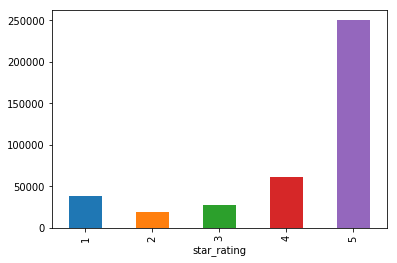

In [213]:
#same visualization with only top purchased products
rating_ver_join = e_ver.merge(e_top, how='left', left_on='product_title', right_on='product_title') # join with top
rating_ver_top = rating_ver_join[rating_ver_join['Review # Significance'] == 1]
grouped_ver = rating_ver_top.groupby('star_rating')
grouped_ver.size().plot( kind='bar')
#rating_ver_top.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


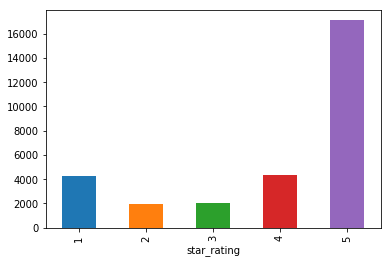

In [76]:
#same visualization with only top purchased products
rating_nver_join = e_nver.merge(e_top, how='left', left_on='product_title', right_on='product_title') # join with top
rating_nver_top = rating_nver_join[rating_ver_join['Review # Significance'] == 1]
grouped_nver = rating_nver_top.groupby('star_rating')
grouped_nver.size().plot( kind='bar')
#rating_ver_top.head()

In [78]:
#average rating for each
print(f'Verified avg: {rating_ver_top["star_rating"].mean()}', f'Unverified avg: {rating_nver_top["star_rating"].mean()}')

Verified avg: 4.180061429828722 Unverified avg: 3.9467611336032387


## Length of these reviews by rating

In [74]:
#new length of words for each
avg_g_ver = grouped_ver['star_rating'].mean()
calc_list = list()
calc_list2 = list()
for review in rating_ver_top['review_body']:
    calc_list.append(len(str(review)))
    
for review in e_nver['review_body']:
    calc_list2.append(len(str(review)))
    
print(f'Avg len Vreview: {np.array(calc_list).mean()}', f' Avg len of UVreview: {np.array(calc_list2).mean()}')

Avg len Vreview: 187.16645150163214  Avg len of UVreview: 640.571180883388


In [79]:
#length visualizations
rating_ver_join['length'] = rating_ver_join['review_body'].apply(lambda x: len(str(x)))
rating_nver_join['length'] = rating_nver_join['review_body'].apply(lambda x: len(str(x)))

Text(0,0.5,'Ratings')

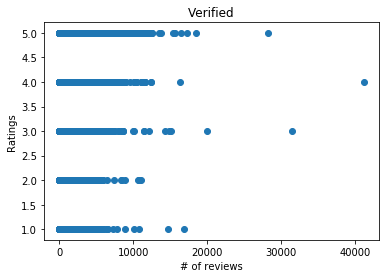

In [80]:
plt.scatter(rating_ver_join['length'], rating_ver_join['star_rating'])
plt.title('Verified')
plt.xlabel('# of reviews')
plt.ylabel('Ratings')

Text(0,0.5,'Ratings')

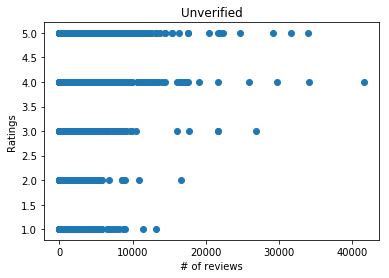

In [81]:
plt.scatter(rating_nver_join['length'], rating_nver_join['star_rating'])
plt.title('Unverified')
plt.xlabel('# of reviews')
plt.ylabel('Ratings')

In [105]:
rating_ver_top = e_ver.merge(e_top, how='left', left_on='product_title', right_on='product_title') # join with top

## By reviewer

### Customers: Average rating given & Number of ratings

In [150]:
#rating_nver_join.head()
e_data_join1 = e_data.merge(e_top, how='left', left_on='product_title', right_on='product_title')
#cus_size = e_data_join1.groupby('customer_id').size()
#e_data_join2 = e_data_join1.merge(cus_size, how='left', left_on='customer_id', right_on='product_title')


In [151]:
#Customers DF
cus = e_data_join1.groupby('customer_id')['star_rating'].agg(['mean', 'count'])

sorted_cus = cus.sort_values('count', ascending = False)
#rename columns
sorted_cus.columns = ['Customer mean rating', 'Customer rating count']
sorted_cus.head()

,Customer mean rating,Customer rating count
customer_id,,
32038204,4.694915,118
14308733,1.022472,89
51812418,3.823529,85
45664110,3.974026,77
52870270,4.712121,66


In [170]:
#join average review for each instance of the 'product_title'

prod_rev = e_data_join1.groupby('product_title')['star_rating'].agg(['mean', 'count'])

#join back to e_data_join1
e_data_join2 = e_data_join1.merge(prod_rev, how='left', left_on='product_title', right_on='product_title')
#only columns of interest
e_data_join2_trim = e_data_join2.groupby('customer_id')['mean'].agg(['mean'])


#join to the sorted_cus df
absolute_cus = sorted_cus.merge(e_data_join2_trim, how='left', left_on='customer_id', right_on='customer_id')
absolute_cus.columns = ['Customer mean rating', 'Customer rating count', 'Mean product rating']
absolute_cus.head()

,Customer mean rating,Customer rating count,Mean product rating
customer_id,,,
32038204,4.694915,118,4.330519
14308733,1.022472,89,1.046192
51812418,3.823529,85,3.816887
45664110,3.974026,77,4.181268
52870270,4.712121,66,4.294056


## Dataframe showing each customer and how their ratings vary from actual product ratings

In [185]:
absolute_cus['Rating_delta'] = absolute_cus['Customer mean rating'] - absolute_cus['Mean product rating']


#### Top 10 by number of reviews written

In [186]:
#visualize for top 10
absolute_cus[:10]

,Customer mean rating,Customer rating count,Mean product rating,Rating_delta
customer_id,,,,
32038204,4.694915,118,4.330519,0.364397
14308733,1.022472,89,1.046192,-0.023720
51812418,3.823529,85,3.816887,0.006642
45664110,3.974026,77,4.181268,-0.207242
52870270,4.712121,66,4.294056,0.418065
14945970,4.206897,58,4.365671,-0.158774
5478843,3.962264,53,4.149466,-0.187202
16255502,4.941176,51,4.246697,0.694480
27546908,4.823529,51,4.635322,0.188207


In [214]:
#sort by those with greatest difference and number of reviews over _____
absolute_cus_identify = (absolute_cus[absolute_cus['Customer rating count'] >= 5]).sort_values('Rating_delta')

In [196]:
absolute_cus_identify[:15]

,Customer mean rating,Customer rating count,Mean product rating,Rating_delta
customer_id,,,,
27833552,1.000000,6,4.118988,-3.118988
22254536,1.000000,5,3.798758,-2.798758
13417096,1.428571,7,4.137186,-2.708614
15209318,1.200000,10,3.884001,-2.684001
41811804,1.800000,5,4.379186,-2.579186
19907926,1.600000,5,4.173850,-2.573850
3062127,1.800000,5,4.333122,-2.533122
11536769,1.800000,5,4.325474,-2.525474
52183619,1.384615,13,3.829254,-2.444639


In [198]:
absolute_cus_identify[-15:]

,Customer mean rating,Customer rating count,Mean product rating,Rating_delta
customer_id,,,,
25408289,5.0,6,3.525067,1.474933
11263027,5.0,9,3.511719,1.488281
14000344,5.0,5,3.493987,1.506013
10079353,5.0,5,3.447045,1.552955
30432728,5.0,5,3.435631,1.564369
39480828,5.0,14,3.429515,1.570485
13605391,5.0,5,3.419573,1.580427
21615987,5.0,7,3.364159,1.635841
28965036,5.0,5,3.296989,1.703011
